In [1]:
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')
%matplotlib inline
import re
import string

import tensorflow as tf
from textblob import TextBlob

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import demoji

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.6.0


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacquesdeclercq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('hashtag_squid_game_25000.csv')

In [3]:
df.shape

(25007, 36)

In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1447547763953070085,1447547763953070085,2021-10-11 15:00:55 CEST,2021-10-11,15:00:55,200,431820409,the_saahil,Saahil Sachdeva,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1447547759687577604,1447547759687577604,2021-10-11 15:00:54 CEST,2021-10-11,15:00:54,200,1185653077690314752,realfearlessher,realfearlessher,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1447547743107354627,1447547743107354627,2021-10-11 15:00:50 CEST,2021-10-11,15:00:50,200,25051623,ktmite,सोम्,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1447547715798376449,1447547715798376449,2021-10-11 15:00:44 CEST,2021-10-11,15:00:44,200,1445055753925107725,kahvedenbirhtn3,Kahvedenbirhatun,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1447547710542843912,1447547710542843912,2021-10-11 15:00:42 CEST,2021-10-11,15:00:42,200,2488032990,raninitv,RaniniTv®,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25007 entries, 0 to 25006
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               25007 non-null  int64  
 1   conversation_id  25007 non-null  int64  
 2   created_at       25007 non-null  object 
 3   date             25007 non-null  object 
 4   time             25007 non-null  object 
 5   timezone         25007 non-null  int64  
 6   user_id          25007 non-null  int64  
 7   username         25007 non-null  object 
 8   name             25007 non-null  object 
 9   place            23 non-null     object 
 10  tweet            25007 non-null  object 
 11  language         25007 non-null  object 
 12  mentions         25007 non-null  object 
 13  urls             25007 non-null  object 
 14  photos           25007 non-null  object 
 15  replies_count    25007 non-null  int64  
 16  retweets_count   25007 non-null  int64  
 17  likes_count 

In [6]:
df = df[['id', 'username', 'tweet', 'language']].copy()

In [7]:
df = df[['id', 'username', 'tweet', 'language']].drop_duplicates()

In [8]:
df.head()

,id,username,tweet,language
0,1447547763953070085,the_saahil,#SquidGame #squidgamenetflix https://t.co/0nN...,und
1,1447547759687577604,realfearlessher,"Are you playing Red Light, Green Light with yo...",en
2,1447547743107354627,ktmite,"#SquidGame आज हेरि भ्याएँ...भतिजले 'ह्यँ काकु,...",ne
3,1447547715798376449,kahvedenbirhtn3,Agalarla ölme keyfi😂#SquidGame https://t.co/8...,tr
4,1447547710542843912,raninitv,Squid Game'in popülaritesi son hızda devam edi...,tr


In [9]:
df['language'].nunique()

53

In [10]:
df['language'] = df['language'] == 'en'

In [11]:
df['language']

0        False
1         True
2        False
3        False
4        False
         ...  
25002    False
25003    False
25004     True
25005     True
25006     True
Name: language, Length: 25007, dtype: bool

In [12]:
df = df[df.language != False]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14493 entries, 1 to 25006
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14493 non-null  int64 
 1   username  14493 non-null  object
 2   tweet     14493 non-null  object
 3   language  14493 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 467.1+ KB


In [14]:
df.reset_index()

,index,id,username,tweet,language
0,1,1447547759687577604,realfearlessher,"Are you playing Red Light, Green Light with yo...",True
1,5,1447547614090629127,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,True
2,7,1447547544561537029,tiptutzone,#SquidGame is the smash hit South Korean thril...,True
3,8,1447547534558343172,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,True
4,9,1447547534466068480,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",True
...,...,...,...,...,...
14488,25000,1446734042150281222,holopress,If #SquidGame was set in Australia surely the ...,True
14489,25001,1446733995794833415,triglavapo,"@PepsiIndia Too late, I already joined the #Sq...",True
14490,25004,1446733623030214659,iumian_,have yall watched the squid game?? its so good...,True
14491,25005,1446733577169752067,dinoray,The lesson of #SquidGame is: you’re better off...,True


In [15]:
df['tweet']

1        Are you playing Red Light, Green Light with yo...
5        Nah the Simpsons are at it again #SquidGame  h...
7        #SquidGame is the smash hit South Korean thril...
8        NEW POD EPISODE: Jill and Justin went to the N...
9        #SquidGame has been the talk of the town, long...
                               ...                        
25000    If #SquidGame was set in Australia surely the ...
25001    @PepsiIndia Too late, I already joined the #Sq...
25004    have yall watched the squid game?? its so good...
25005    The lesson of #SquidGame is: you’re better off...
25006    dream girl #netflix #squidgame #korean #bugsbu...
Name: tweet, Length: 14493, dtype: object

In [16]:
df = df[['id', 'username', 'tweet', 'language']].drop_duplicates()

In [17]:
df = df[['username', 'tweet']].copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14493 entries, 1 to 25006
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  14493 non-null  object
 1   tweet     14493 non-null  object
dtypes: object(2)
memory usage: 339.7+ KB


In [19]:
df.head()

,username,tweet
1,realfearlessher,"Are you playing Red Light, Green Light with yo..."
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...
7,tiptutzone,#SquidGame is the smash hit South Korean thril...
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long..."


### EDA

In [20]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [21]:
tweet_All = " ".join(review for review in df.tweet)

(-0.5, 399.5, 199.5, -0.5)

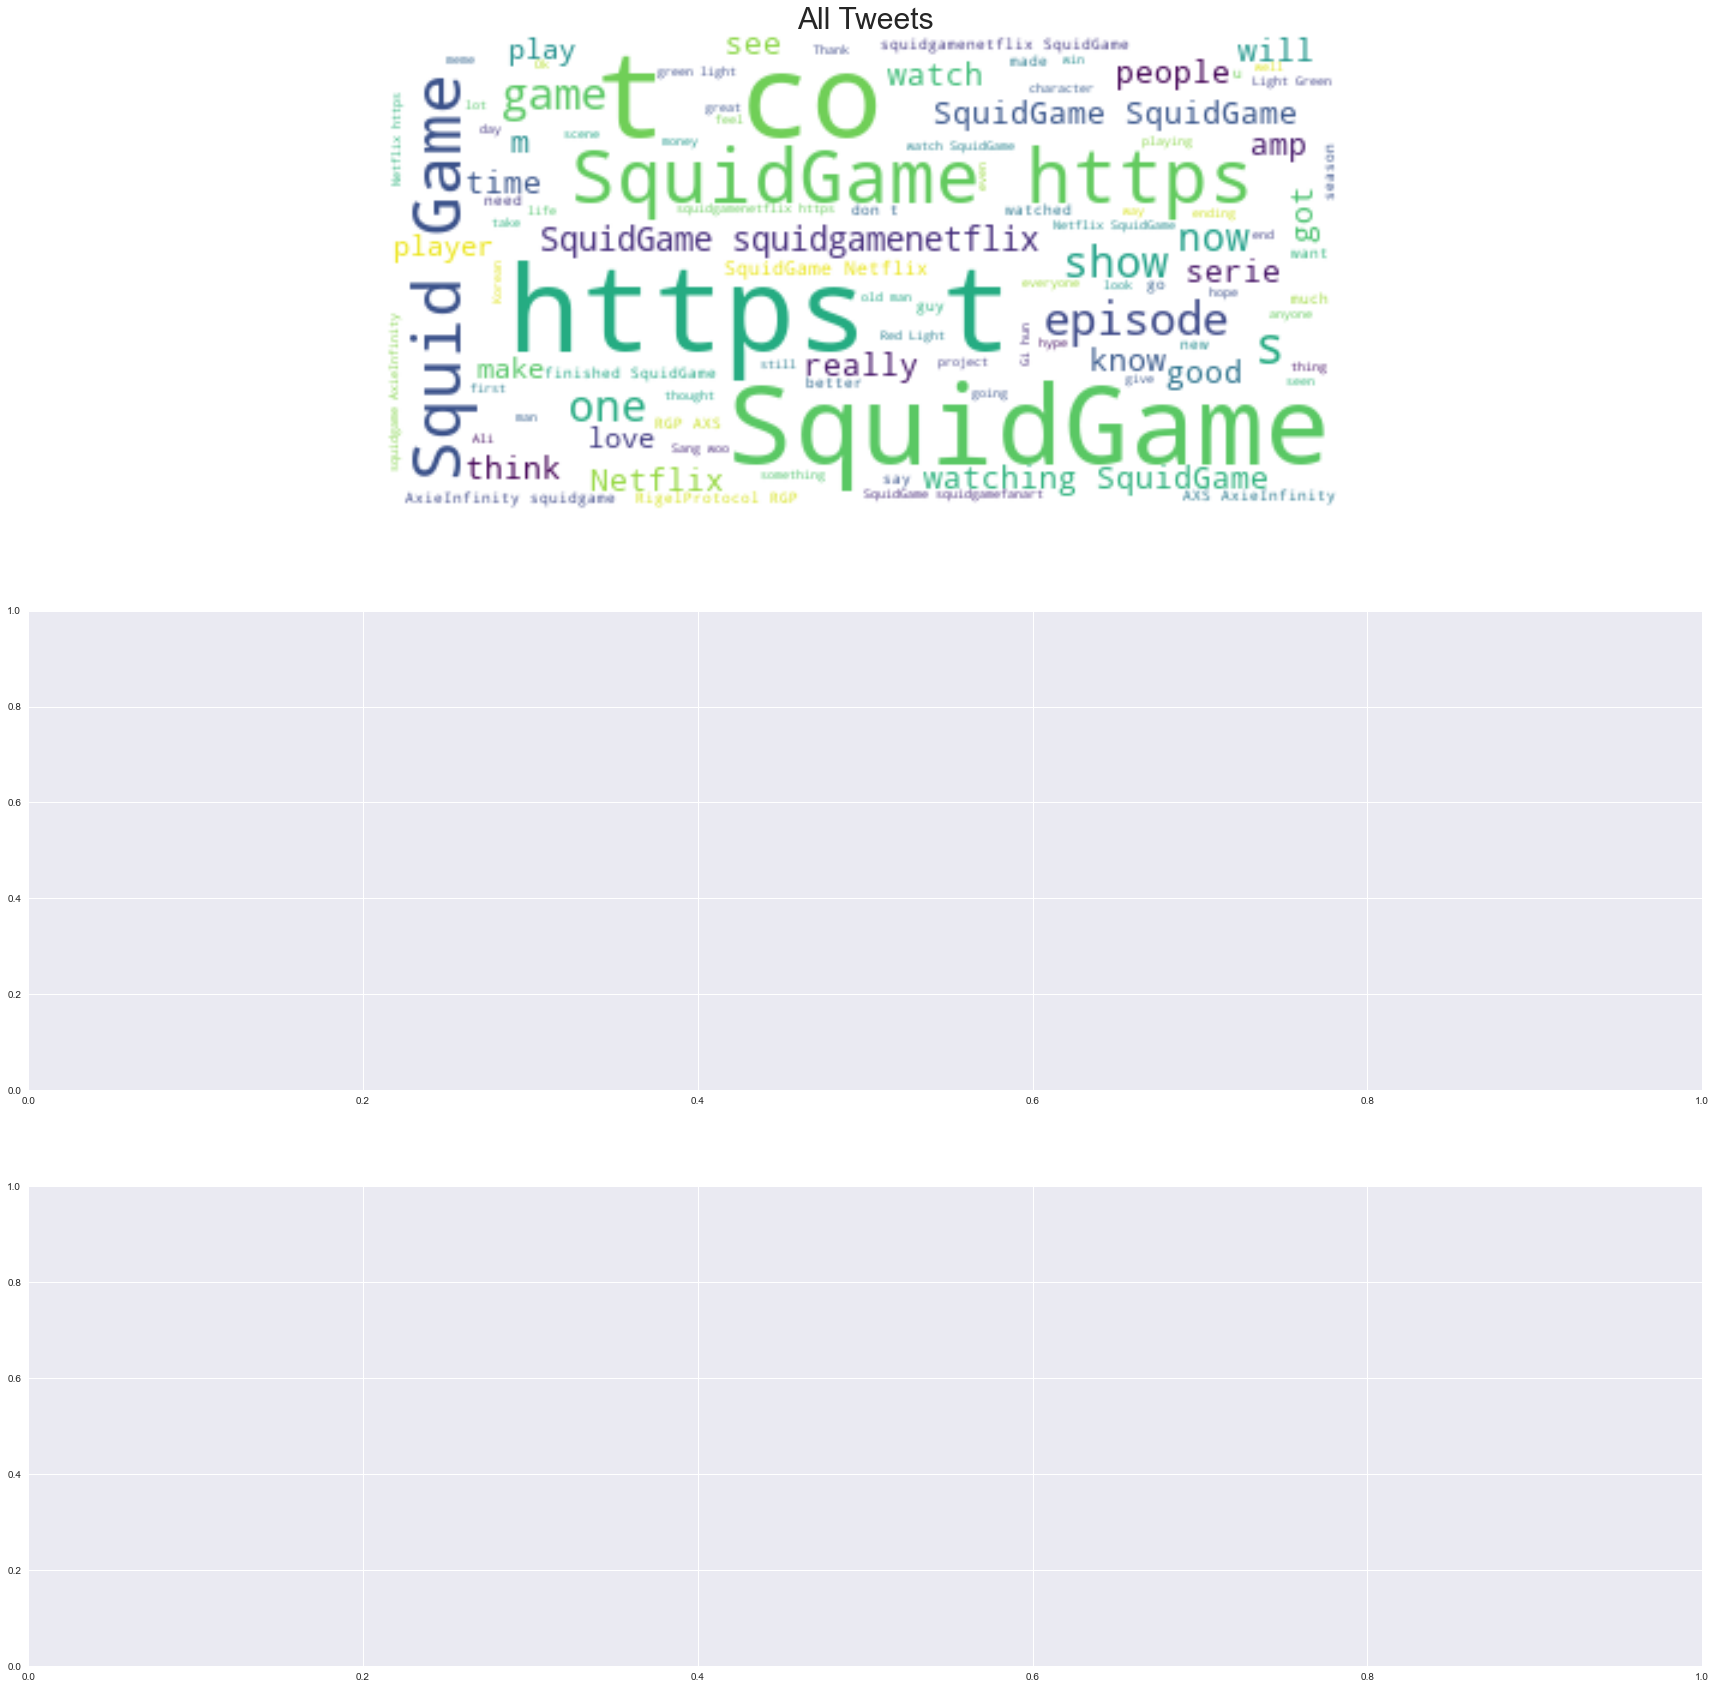

In [22]:
fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')

Pre-processing text data¶
Most of the text data are cleaned by following below steps.

- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Remove stopwords
- Lammetization/stemming - Tranforming any form of a word to its root word

### Remove Punctuation

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,username,tweet,tweet_punct
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 #SquidGame #...,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...
13,declangroarke,My only option now is to watch #SquidGame just...,My only option now is to watch SquidGame just ...
14,boranmfd,"#SquidGame has inspired real-life spin-offs, b...",SquidGame has inspired reallife spinoffs but n...
15,turkeybaconbust,//Squid game spoilers Screaming and crying rn...,Squid game spoilers Screaming and crying rn s...
16,farhana_ras_hid,Finally have time in hand. Gonna watch #SquidG...,Finally have time in hand Gonna watch SquidGam...


### WordCloud

In [25]:
tweet_punct = " ".join(review for review in df.tweet_punct)

(-0.5, 399.5, 199.5, -0.5)

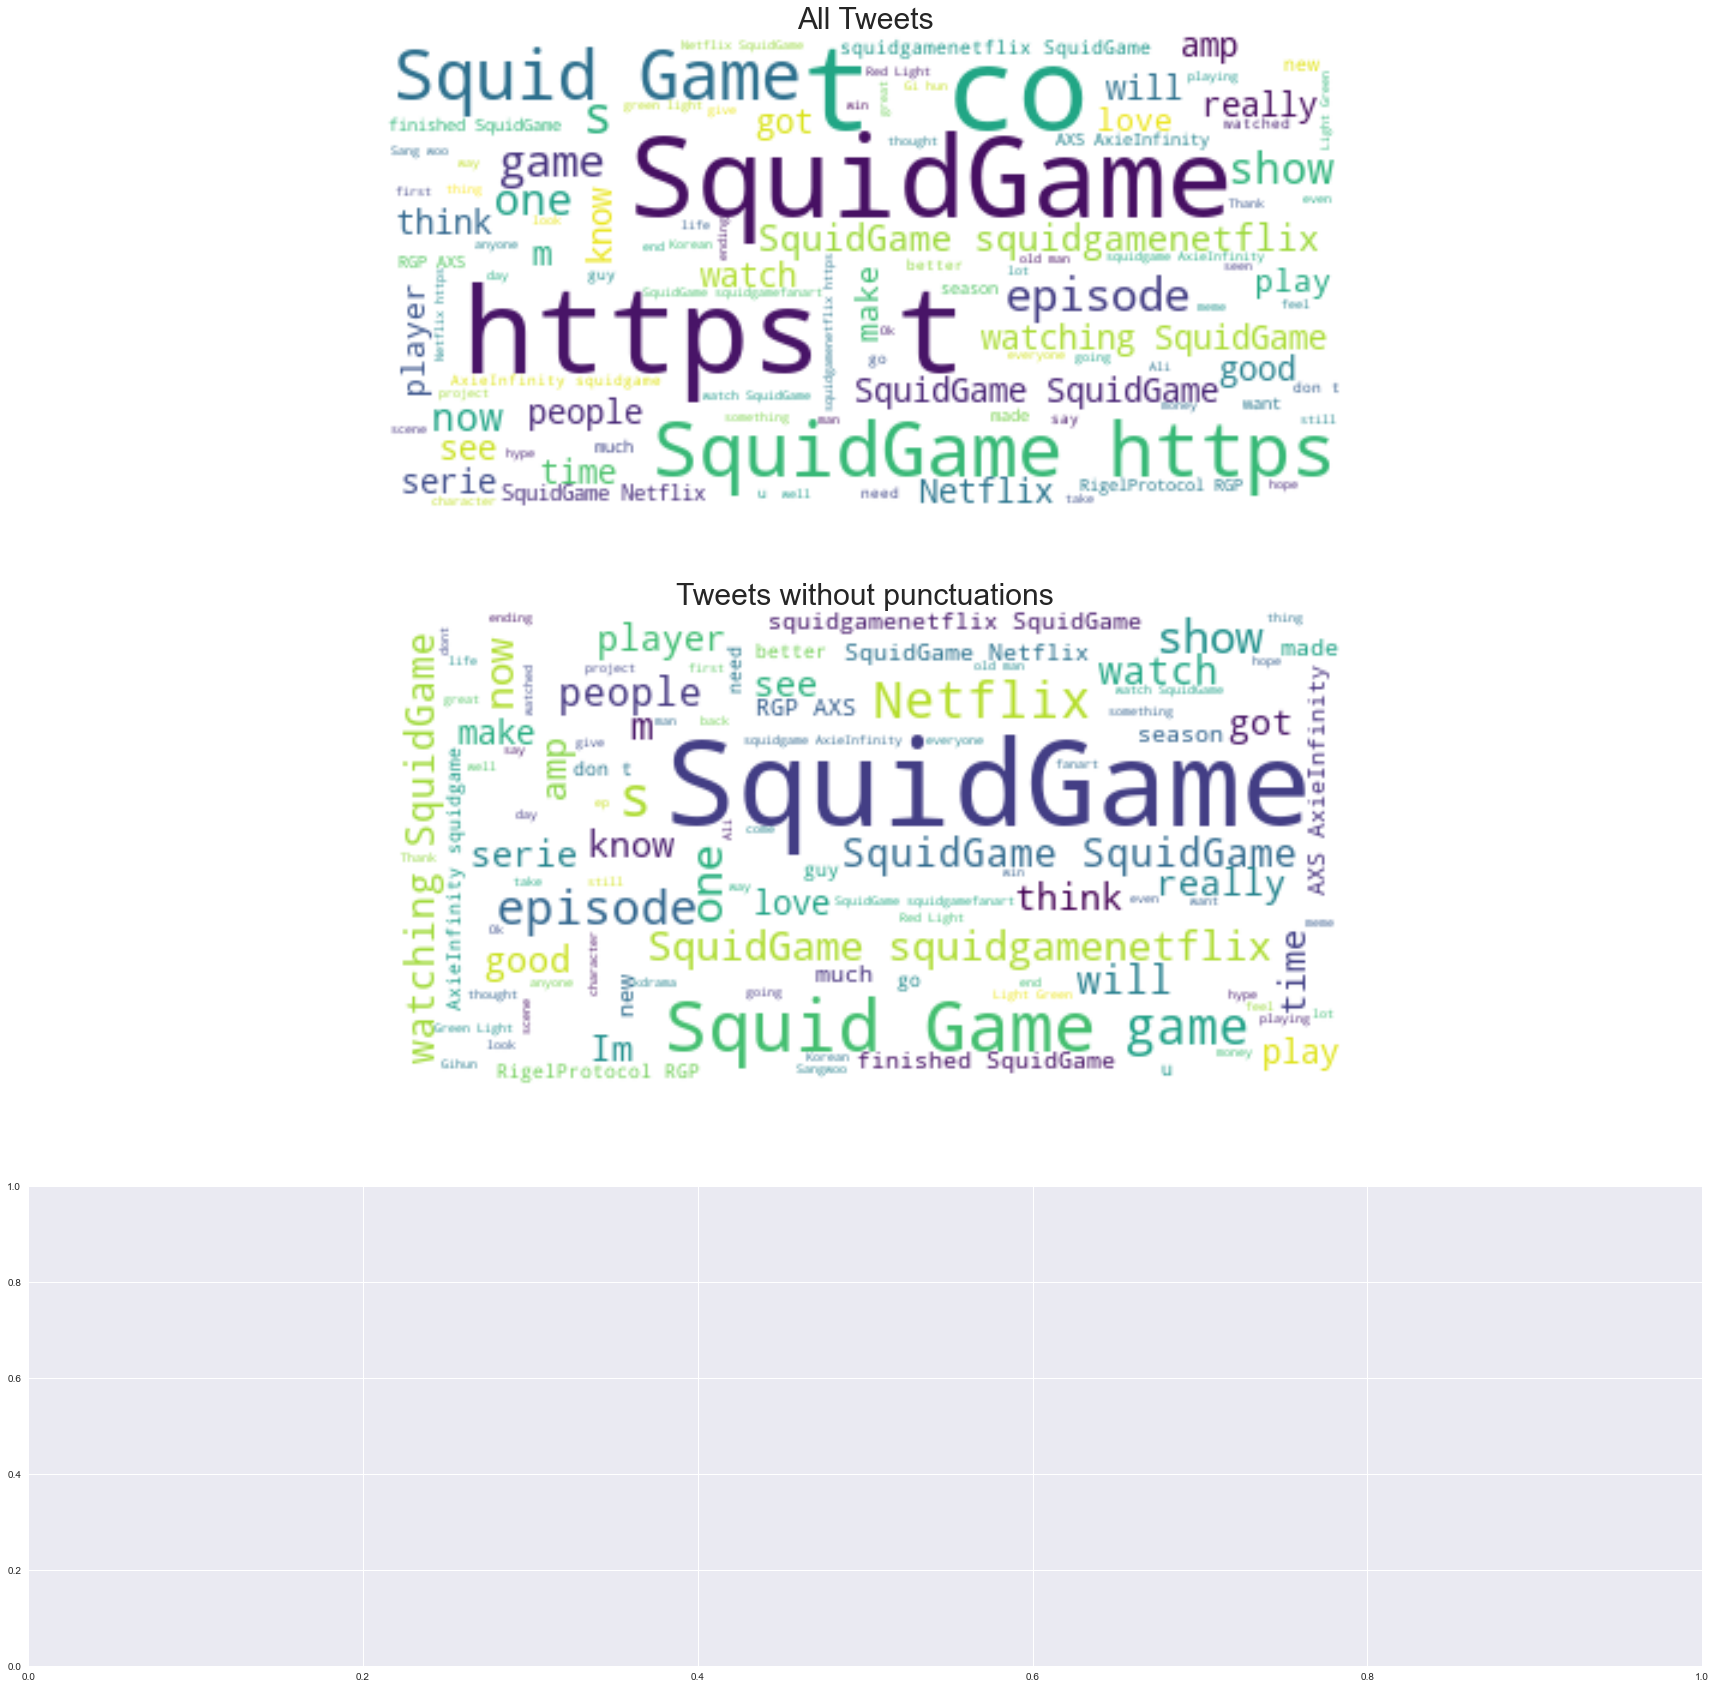

In [26]:
fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_punct = WordCloud(max_font_size = 50, max_words=100, background_color='white').generate(tweet_punct)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_punct, interpolation='bilinear')
ax[1].set_title('Tweets without punctuations',fontsize=30)
ax[1].axis('off')

### Tokenization

In [27]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tweet_tokenized'] = df['tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,username,tweet,tweet_punct,tweet_tokenized
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...,"[are, you, playing, red, light, green, light, ..."
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...,"[nah, the, simpsons, are, at, it, again, squid..."
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...,"[squidgame, is, the, smash, hit, south, korean..."
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...,"[new, pod, episode, jill, and, justin, went, t..."
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...,"[squidgame, has, been, the, talk, of, the, tow..."


### Remove Stopwords

In [28]:
stopword = nltk.corpus.stopwords.words('english')
#stopword.extend(['squidgame', 'netflix'])

In [29]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['tweet_nonstop'] = df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,username,tweet,tweet_punct,tweet_tokenized,tweet_nonstop
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...,"[are, you, playing, red, light, green, light, ...","[playing, red, light, green, light, goals, bus..."
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...,"[nah, the, simpsons, are, at, it, again, squid...","[nah, simpsons, squidgame, httpstcoigortvy]"
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...,"[squidgame, is, the, smash, hit, south, korean...","[squidgame, smash, hit, south, korean, thrille..."
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...,"[new, pod, episode, jill, and, justin, went, t...","[new, pod, episode, jill, justin, went, new, y..."
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...,"[squidgame, has, been, the, talk, of, the, tow...","[squidgame, talk, town, long, though, korean, ..."
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 #SquidGame #...,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...,"[wth, is, wrong, with, you, squidgame, gihun, ...","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]"
13,declangroarke,My only option now is to watch #SquidGame just...,My only option now is to watch SquidGame just ...,"[my, only, option, now, is, to, watch, squidga...","[option, watch, squidgame, understand, appreci..."
14,boranmfd,"#SquidGame has inspired real-life spin-offs, b...",SquidGame has inspired reallife spinoffs but n...,"[squidgame, has, inspired, reallife, spinoffs,...","[squidgame, inspired, reallife, spinoffs, legi..."
15,turkeybaconbust,//Squid game spoilers Screaming and crying rn...,Squid game spoilers Screaming and crying rn s...,"[squid, game, spoilers, screaming, and, crying...","[squid, game, spoilers, screaming, crying, rn,..."
16,farhana_ras_hid,Finally have time in hand. Gonna watch #SquidG...,Finally have time in hand Gonna watch SquidGam...,"[finally, have, time, in, hand, gonna, watch, ...","[finally, time, hand, gonna, watch, squidgame,..."


### Stemming

In [30]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['tweet_stemmed'] = df['tweet_nonstop'].apply(lambda x: stemming(x))
df.head(10)

,username,tweet,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...,"[are, you, playing, red, light, green, light, ...","[playing, red, light, green, light, goals, bus...","[play, red, light, green, light, goal, busi, l..."
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...,"[nah, the, simpsons, are, at, it, again, squid...","[nah, simpsons, squidgame, httpstcoigortvy]","[nah, simpson, squidgam, httpstcoigortvi]"
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...,"[squidgame, is, the, smash, hit, south, korean...","[squidgame, smash, hit, south, korean, thrille...","[squidgam, smash, hit, south, korean, thriller..."
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...,"[new, pod, episode, jill, and, justin, went, t...","[new, pod, episode, jill, justin, went, new, y...","[new, pod, episod, jill, justin, went, new, yo..."
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...,"[squidgame, has, been, the, talk, of, the, tow...","[squidgame, talk, town, long, though, korean, ...","[squidgam, talk, town, long, though, korean, c..."
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 #SquidGame #...,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...,"[wth, is, wrong, with, you, squidgame, gihun, ...","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]","[wth, wrong, squidgam, gihun, httpstcomtnpal, ]"
13,declangroarke,My only option now is to watch #SquidGame just...,My only option now is to watch SquidGame just ...,"[my, only, option, now, is, to, watch, squidga...","[option, watch, squidgame, understand, appreci...","[option, watch, squidgam, understand, appreci,..."
14,boranmfd,"#SquidGame has inspired real-life spin-offs, b...",SquidGame has inspired reallife spinoffs but n...,"[squidgame, has, inspired, reallife, spinoffs,...","[squidgame, inspired, reallife, spinoffs, legi...","[squidgam, inspir, reallif, spinoff, legit, ne..."
15,turkeybaconbust,//Squid game spoilers Screaming and crying rn...,Squid game spoilers Screaming and crying rn s...,"[squid, game, spoilers, screaming, and, crying...","[squid, game, spoilers, screaming, crying, rn,...","[squid, game, spoiler, scream, cri, rn, deserv..."
16,farhana_ras_hid,Finally have time in hand. Gonna watch #SquidG...,Finally have time in hand Gonna watch SquidGam...,"[finally, have, time, in, hand, gonna, watch, ...","[finally, time, hand, gonna, watch, squidgame,...","[final, time, hand, gonna, watch, squidgam, week]"


### Lemmatizer

In [31]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['tweet_lemmatized'] = df['tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head(10)

,username,tweet,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...,"[are, you, playing, red, light, green, light, ...","[playing, red, light, green, light, goals, bus...","[play, red, light, green, light, goal, busi, l...","[playing, red, light, green, light, goal, busi..."
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...,"[nah, the, simpsons, are, at, it, again, squid...","[nah, simpsons, squidgame, httpstcoigortvy]","[nah, simpson, squidgam, httpstcoigortvi]","[nah, simpson, squidgame, httpstcoigortvy]"
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...,"[squidgame, is, the, smash, hit, south, korean...","[squidgame, smash, hit, south, korean, thrille...","[squidgam, smash, hit, south, korean, thriller...","[squidgame, smash, hit, south, korean, thrille..."
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...,"[new, pod, episode, jill, and, justin, went, t...","[new, pod, episode, jill, justin, went, new, y...","[new, pod, episod, jill, justin, went, new, yo...","[new, pod, episode, jill, justin, went, new, y..."
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...,"[squidgame, has, been, the, talk, of, the, tow...","[squidgame, talk, town, long, though, korean, ...","[squidgam, talk, town, long, though, korean, c...","[squidgame, talk, town, long, though, korean, ..."
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 #SquidGame #...,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...,"[wth, is, wrong, with, you, squidgame, gihun, ...","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]","[wth, wrong, squidgam, gihun, httpstcomtnpal, ]","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]"
13,declangroarke,My only option now is to watch #SquidGame just...,My only option now is to watch SquidGame just ...,"[my, only, option, now, is, to, watch, squidga...","[option, watch, squidgame, understand, appreci...","[option, watch, squidgam, understand, appreci,...","[option, watch, squidgame, understand, appreci..."
14,boranmfd,"#SquidGame has inspired real-life spin-offs, b...",SquidGame has inspired reallife spinoffs but n...,"[squidgame, has, inspired, reallife, spinoffs,...","[squidgame, inspired, reallife, spinoffs, legi...","[squidgam, inspir, reallif, spinoff, legit, ne...","[squidgame, inspired, reallife, spinoffs, legi..."
15,turkeybaconbust,//Squid game spoilers Screaming and crying rn...,Squid game spoilers Screaming and crying rn s...,"[squid, game, spoilers, screaming, and, crying...","[squid, game, spoilers, screaming, crying, rn,...","[squid, game, spoiler, scream, cri, rn, deserv...","[squid, game, spoiler, screaming, cry, rn, des..."
16,farhana_ras_hid,Finally have time in hand. Gonna watch #SquidG...,Finally have time in hand Gonna watch SquidGam...,"[finally, have, time, in, hand, gonna, watch, ...","[finally, time, hand, gonna, watch, squidgame,...","[final, time, hand, gonna, watch, squidgam, week]","[finally, time, hand, gonna, watch, squidgame,..."


### EMOJI'S



In [32]:
def convert_emoji(tweet):
    dict_emojis = demoji.findall(tweet)
    for emoji, emoji_word in dict_emojis.items():
        tweet = tweet.replace(emoji, f' {emoji_word}')
    return tweet

In [33]:
df['tweet_emoji'] = df['tweet'].apply(lambda x: convert_emoji(x))
df.head(10)

,username,tweet,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_emoji
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...,"[are, you, playing, red, light, green, light, ...","[playing, red, light, green, light, goals, bus...","[play, red, light, green, light, goal, busi, l...","[playing, red, light, green, light, goal, busi...","Are you playing Red Light, Green Light with yo..."
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...,"[nah, the, simpsons, are, at, it, again, squid...","[nah, simpsons, squidgame, httpstcoigortvy]","[nah, simpson, squidgam, httpstcoigortvi]","[nah, simpson, squidgame, httpstcoigortvy]",Nah the Simpsons are at it again #SquidGame h...
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...,"[squidgame, is, the, smash, hit, south, korean...","[squidgame, smash, hit, south, korean, thrille...","[squidgam, smash, hit, south, korean, thriller...","[squidgame, smash, hit, south, korean, thrille...",#SquidGame is the smash hit South Korean thril...
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...,"[new, pod, episode, jill, and, justin, went, t...","[new, pod, episode, jill, justin, went, new, y...","[new, pod, episod, jill, justin, went, new, yo...","[new, pod, episode, jill, justin, went, new, y...",NEW POD EPISODE: Jill and Justin went to the N...
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...,"[squidgame, has, been, the, talk, of, the, tow...","[squidgame, talk, town, long, though, korean, ...","[squidgam, talk, town, long, though, korean, c...","[squidgame, talk, town, long, though, korean, ...","#SquidGame has been the talk of the town, long..."
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 #SquidGame #...,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...,"[wth, is, wrong, with, you, squidgame, gihun, ...","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]","[wth, wrong, squidgam, gihun, httpstcomtnpal, ]","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]",WTH is wrong with you loudly crying face loud...
13,declangroarke,My only option now is to watch #SquidGame just...,My only option now is to watch SquidGame just ...,"[my, only, option, now, is, to, watch, squidga...","[option, watch, squidgame, understand, appreci...","[option, watch, squidgam, understand, appreci,...","[option, watch, squidgame, understand, appreci...",My only option now is to watch #SquidGame just...
14,boranmfd,"#SquidGame has inspired real-life spin-offs, b...",SquidGame has inspired reallife spinoffs but n...,"[squidgame, has, inspired, reallife, spinoffs,...","[squidgame, inspired, reallife, spinoffs, legi...","[squidgam, inspir, reallif, spinoff, legit, ne...","[squidgame, inspired, reallife, spinoffs, legi...","#SquidGame has inspired real-life spin-offs, b..."
15,turkeybaconbust,//Squid game spoilers Screaming and crying rn...,Squid game spoilers Screaming and crying rn s...,"[squid, game, spoilers, screaming, and, crying...","[squid, game, spoilers, screaming, crying, rn,...","[squid, game, spoiler, scream, cri, rn, deserv...","[squid, game, spoiler, screaming, cry, rn, des...",//Squid game spoilers Screaming and crying rn...
16,farhana_ras_hid,Finally have time in hand. Gonna watch #SquidG...,Finally have time in hand Gonna watch SquidGam...,"[finally, have, time, in, hand, gonna, watch, ...","[finally, time, hand, gonna, watch, squidgame,...","[final, time, hand, gonna, watch, squidgam, week]","[finally, time, hand, gonna, watch, squidgame,...",Finally have time in hand. Gonna watch #SquidG...


### VECTORISATION
- Cleaning data in single line through passing clean_text in the CountVectorizer

In [34]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [35]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

14493 Number of tweets has 24278 words


In [36]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aaaa,aaaaaaaaahhh,aaaaah,aaaaahhhhhhhhhhh,aaaah,aaajajajajahah,aah,aaj,...,𝙴𝙰𝚂𝚈,𝙸𝚂,𝚁𝚄𝙻𝙴𝚂,𝚂𝚚𝚞𝚒𝚍𝚐𝚊𝚖𝚎,𝚐𝚊𝚖𝚎,𝚔𝚊𝚐𝚎𝚑𝚒𝚗𝚊,𝚜,𝚜𝚚𝚞𝚒𝚍,𝚟𝚎𝚛,𝚡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TEXTBLOB OG TWEET

In [37]:
df['sentiment']=df['tweet'].apply(lambda x:TextBlob(x).sentiment[0])
df['subject']=df['tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df['polarity']=df['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')

In [38]:
df.head(10)

,username,tweet,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_emoji,sentiment,subject,polarity
1,realfearlessher,"Are you playing Red Light, Green Light with yo...",Are you playing Red Light Green Light with you...,"[are, you, playing, red, light, green, light, ...","[playing, red, light, green, light, goals, bus...","[play, red, light, green, light, goal, busi, l...","[playing, red, light, green, light, goal, busi...","Are you playing Red Light, Green Light with yo...",0.150000,0.366667,pos
5,kaybizzlebee,Nah the Simpsons are at it again #SquidGame h...,Nah the Simpsons are at it again SquidGame ht...,"[nah, the, simpsons, are, at, it, again, squid...","[nah, simpsons, squidgame, httpstcoigortvy]","[nah, simpson, squidgam, httpstcoigortvi]","[nah, simpson, squidgame, httpstcoigortvy]",Nah the Simpsons are at it again #SquidGame h...,0.000000,0.000000,pos
7,tiptutzone,#SquidGame is the smash hit South Korean thril...,SquidGame is the smash hit South Korean thrill...,"[squidgame, is, the, smash, hit, south, korean...","[squidgame, smash, hit, south, korean, thrille...","[squidgam, smash, hit, south, korean, thriller...","[squidgame, smash, hit, south, korean, thrille...",#SquidGame is the smash hit South Korean thril...,0.439815,0.596296,pos
8,bestavailplayer,NEW POD EPISODE: Jill and Justin went to the N...,NEW POD EPISODE Jill and Justin went to the Ne...,"[new, pod, episode, jill, and, justin, went, t...","[new, pod, episode, jill, justin, went, new, y...","[new, pod, episod, jill, justin, went, new, yo...","[new, pod, episode, jill, justin, went, new, y...",NEW POD EPISODE: Jill and Justin went to the N...,0.366364,0.561818,pos
9,tgs_thegeekshow,"#SquidGame has been the talk of the town, long...",SquidGame has been the talk of the town long b...,"[squidgame, has, been, the, talk, of, the, tow...","[squidgame, talk, town, long, though, korean, ...","[squidgam, talk, town, long, though, korean, c...","[squidgame, talk, town, long, though, korean, ...","#SquidGame has been the talk of the town, long...",0.316667,0.316667,pos
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 #SquidGame #...,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...,"[wth, is, wrong, with, you, squidgame, gihun, ...","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]","[wth, wrong, squidgam, gihun, httpstcomtnpal, ]","[wth, wrong, squidgame, gihun, httpstcomtnpal, ]",WTH is wrong with you loudly crying face loud...,-0.500000,0.900000,neg
13,declangroarke,My only option now is to watch #SquidGame just...,My only option now is to watch SquidGame just ...,"[my, only, option, now, is, to, watch, squidga...","[option, watch, squidgame, understand, appreci...","[option, watch, squidgam, understand, appreci,...","[option, watch, squidgame, understand, appreci...",My only option now is to watch #SquidGame just...,0.016667,0.533333,pos
14,boranmfd,"#SquidGame has inspired real-life spin-offs, b...",SquidGame has inspired reallife spinoffs but n...,"[squidgame, has, inspired, reallife, spinoffs,...","[squidgame, inspired, reallife, spinoffs, legi...","[squidgam, inspir, reallif, spinoff, legit, ne...","[squidgame, inspired, reallife, spinoffs, legi...","#SquidGame has inspired real-life spin-offs, b...",0.000000,0.000000,pos
15,turkeybaconbust,//Squid game spoilers Screaming and crying rn...,Squid game spoilers Screaming and crying rn s...,"[squid, game, spoilers, screaming, and, crying...","[squid, game, spoilers, screaming, crying, rn,...","[squid, game, spoiler, scream, cri, rn, deserv...","[squid, game, spoiler, screaming, cry, rn, des...",//Squid game spoilers Screaming and crying rn...,-0.033333,0.500000,neg
16,farhana_ras_hid,Finally have time in hand. Gonna watch #SquidG...,Finally have time in hand Gonna watch SquidGam...,"[finally, have, time, in, hand, gonna, watch, ...","[finally, time, hand, gonna, watch, squidgame,...","[final, time, hand, gonna, watch, squidgam, week]","[finally, time, hand, gonna, watch, squidgame,..."

## TEXTBLOB TWEET_PUNCT

In [39]:
df_punc = df[['username','tweet_punct']].copy()

In [40]:
df_punc.head()

,username,tweet_punct
1,realfearlessher,Are you playing Red Light Green Light with you...
5,kaybizzlebee,Nah the Simpsons are at it again SquidGame ht...
7,tiptutzone,SquidGame is the smash hit South Korean thrill...
8,bestavailplayer,NEW POD EPISODE Jill and Justin went to the Ne...
9,tgs_thegeekshow,SquidGame has been the talk of the town long b...


In [42]:
df_punc['sentiment']=df_punc['tweet_punct'].apply(lambda x:TextBlob(x).sentiment[0])
df_punc['subject']=df_punc['tweet_punct'].apply(lambda x: TextBlob(x).sentiment[1])
df_punc['polarity']=df_punc['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')
df_punc.head(10)

,username,tweet_punct,sentiment,subject,polarity
1,realfearlessher,Are you playing Red Light Green Light with you...,0.150000,0.366667,pos
5,kaybizzlebee,Nah the Simpsons are at it again SquidGame ht...,0.000000,0.000000,pos
7,tiptutzone,SquidGame is the smash hit South Korean thrill...,0.374815,0.596296,pos
8,bestavailplayer,NEW POD EPISODE Jill and Justin went to the Ne...,0.334545,0.561818,pos
9,tgs_thegeekshow,SquidGame has been the talk of the town long b...,0.316667,0.316667,pos
12,3ariibelle,WTH is wrong with you 😭😭😭😭😂😂😂😂😂😂😂 SquidGame Gi...,-0.500000,0.900000,neg
13,declangroarke,My only option now is to watch SquidGame just ...,0.016667,0.533333,pos
14,boranmfd,SquidGame has inspired reallife spinoffs but n...,0.000000,0.000000,pos
15,turkeybaconbust,Squid game spoilers Screaming and crying rn s...,-0.033333,0.500000,neg
16,farhana_ras_hid,Finally have time in hand Gonna watch SquidGam...,0.000000,1.000000,pos


## TEXTBLOB TOKENIZED TWEETS

In [43]:
# Create a new DF

df_tokenized = df[['username','tweet_tokenized']].copy()

In [44]:
# Convert list into Strings

df_tokenized['tweet_tokenized'] = [','.join(map(str, l)) for l in df['tweet_tokenized']]

In [55]:
df_tokenized['sentiment']=df_tokenized['tweet_tokenized'].apply(lambda x:TextBlob(x).sentiment[0])
df_tokenized['subject']=df_tokenized['tweet_tokenized'].apply(lambda x: TextBlob(x).sentiment[1])
df_tokenized['polarity']=df_tokenized['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')
df_tokenized.head(10)

,username,tweet_tokenized,sentiment,subject,polarity
1,realfearlessher,"are,you,playing,red,light,green,light,with,you...",0.0,0.0,pos
5,kaybizzlebee,"nah,the,simpsons,are,at,it,again,squidgame,htt...",0.0,0.0,pos
7,tiptutzone,"squidgame,is,the,smash,hit,south,korean,thrill...",0.0,0.0,pos
8,bestavailplayer,"new,pod,episode,jill,and,justin,went,to,the,ne...",0.0,0.0,pos
9,tgs_thegeekshow,"squidgame,has,been,the,talk,of,the,town,long,b...",0.0,0.0,pos
12,3ariibelle,"wth,is,wrong,with,you,squidgame,gihun,httpstco...",0.0,0.0,pos
13,declangroarke,"my,only,option,now,is,to,watch,squidgame,just,...",0.0,0.0,pos
14,boranmfd,"squidgame,has,inspired,reallife,spinoffs,but,n...",0.0,0.0,pos
15,turkeybaconbust,"squid,game,spoilers,screaming,and,crying,rn,sh...",0.0,0.0,pos
16,farhana_ras_hid,"finally,have,time,in,hand,gonna,watch,squidgam...",0.0,0.0,pos


## TEXTBLOB NO STOP WORDS

In [49]:
df_nonstop = df[['username','tweet_nonstop']].copy()

In [50]:
df_nonstop['tweet_nonstop'] = [','.join(map(str, l)) for l in df['tweet_nonstop']]

In [56]:
df_nonstop['sentiment']=df_nonstop['tweet_nonstop'].apply(lambda x:TextBlob(x).sentiment[0])
df_nonstop['subject']=df_nonstop['tweet_nonstop'].apply(lambda x: TextBlob(x).sentiment[1])
df_nonstop['polarity']=df_nonstop['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')
df_nonstop.head(10)

,username,tweet_nonstop,sentiment,subject,polarity
1,realfearlessher,"playing,red,light,green,light,goals,business,l...",0.0,0.0,pos
5,kaybizzlebee,"nah,simpsons,squidgame,httpstcoigortvy",0.0,0.0,pos
7,tiptutzone,"squidgame,smash,hit,south,korean,thriller,netf...",0.0,0.0,pos
8,bestavailplayer,"new,pod,episode,jill,justin,went,new,york,film...",0.0,0.0,pos
9,tgs_thegeekshow,"squidgame,talk,town,long,though,korean,cinema,...",0.0,0.0,pos
12,3ariibelle,"wth,wrong,squidgame,gihun,httpstcomtnpal,",0.0,0.0,pos
13,declangroarke,"option,watch,squidgame,understand,appreciate,c...",0.0,0.0,pos
14,boranmfd,"squidgame,inspired,reallife,spinoffs,legit,net...",0.0,0.0,pos
15,turkeybaconbust,"squid,game,spoilers,screaming,crying,rn,deserv...",0.0,0.0,pos
16,farhana_ras_hid,"finally,time,hand,gonna,watch,squidgame,week",0.0,0.0,pos


## TEXTBLOB STEMMED TWEETS

In [52]:
df_stemmed = df[['username','tweet_stemmed']].copy()

In [53]:
df_stemmed['tweet_stemmed'] = [','.join(map(str, l)) for l in df['tweet_stemmed']]

In [57]:
df_stemmed['sentiment']=df_stemmed['tweet_stemmed'].apply(lambda x:TextBlob(x).sentiment[0])
df_stemmed['subject']=df_stemmed['tweet_stemmed'].apply(lambda x: TextBlob(x).sentiment[1])
df_stemmed['polarity']=df_stemmed['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')
df_stemmed.head(10)

,username,tweet_stemmed,sentiment,subject,polarity
1,realfearlessher,"play,red,light,green,light,goal,busi,life,sudd...",0.0,0.0,pos
5,kaybizzlebee,"nah,simpson,squidgam,httpstcoigortvi",0.0,0.0,pos
7,tiptutzone,"squidgam,smash,hit,south,korean,thriller,netfl...",0.0,0.0,pos
8,bestavailplayer,"new,pod,episod,jill,justin,went,new,york,film,...",0.0,0.0,pos
9,tgs_thegeekshow,"squidgam,talk,town,long,though,korean,cinema,o...",0.0,0.0,pos
12,3ariibelle,"wth,wrong,squidgam,gihun,httpstcomtnpal,",0.0,0.0,pos
13,declangroarke,"option,watch,squidgam,understand,appreci,conte...",0.0,0.0,pos
14,boranmfd,"squidgam,inspir,reallif,spinoff,legit,netflix,...",0.0,0.0,pos
15,turkeybaconbust,"squid,game,spoiler,scream,cri,rn,deserv,prize,...",0.0,0.0,pos
16,farhana_ras_hid,"final,time,hand,gonna,watch,squidgam,week",0.0,0.0,pos


## TEXTBLOB WITH LEMMATIZED TWEET

In [59]:
df_lemmatized = df[['username','tweet_lemmatized']].copy()

In [60]:
df_lemmatized['tweet_lemmatized'] = [','.join(map(str, l)) for l in df['tweet_lemmatized']]

In [64]:
df_lemmatized['sentiment']=df_lemmatized['tweet_lemmatized'].apply(lambda x:TextBlob(x).sentiment[0])
df_lemmatized['subject']=df_lemmatized['tweet_lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])
df_lemmatized['polarity']=df_lemmatized['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')
df_lemmatized.head(10)

,username,tweet_lemmatized,sentiment,subject,polarity
1,realfearlessher,"playing,red,light,green,light,goal,business,li...",0.0,0.0,pos
5,kaybizzlebee,"nah,simpson,squidgame,httpstcoigortvy",0.0,0.0,pos
7,tiptutzone,"squidgame,smash,hit,south,korean,thriller,netf...",0.0,0.0,pos
8,bestavailplayer,"new,pod,episode,jill,justin,went,new,york,film...",0.0,0.0,pos
9,tgs_thegeekshow,"squidgame,talk,town,long,though,korean,cinema,...",0.0,0.0,pos
12,3ariibelle,"wth,wrong,squidgame,gihun,httpstcomtnpal,",0.0,0.0,pos
13,declangroarke,"option,watch,squidgame,understand,appreciate,c...",0.0,0.0,pos
14,boranmfd,"squidgame,inspired,reallife,spinoffs,legit,net...",0.0,0.0,pos
15,turkeybaconbust,"squid,game,spoiler,screaming,cry,rn,deserved,p...",0.0,0.0,pos
16,farhana_ras_hid,"finally,time,hand,gonna,watch,squidgame,week",0.0,0.0,pos


## TEXTBLOB WITHOUTH EMOJI'S (BASED ON OG TWEETS)

In [66]:
df_emoji = df[['username','tweet_emoji']].copy()

In [67]:
df_emoji['tweet_emoji'] = df['tweet_emoji'].apply(lambda x: remove_punct(x))

In [68]:
df_emoji['sentiment']=df_emoji['tweet_emoji'].apply(lambda x:TextBlob(x).sentiment[0])
df_emoji['subject']=df_emoji['tweet_emoji'].apply(lambda x: TextBlob(x).sentiment[1])
df_emoji['polarity']=df_emoji['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')
df_emoji.head(10)

,username,tweet_emoji,sentiment,subject,polarity
1,realfearlessher,Are you playing Red Light Green Light with you...,0.150000,0.366667,pos
5,kaybizzlebee,Nah the Simpsons are at it again SquidGame ht...,0.000000,0.000000,pos
7,tiptutzone,SquidGame is the smash hit South Korean thrill...,0.374815,0.596296,pos
8,bestavailplayer,NEW POD EPISODE Jill and Justin went to the Ne...,0.334545,0.561818,pos
9,tgs_thegeekshow,SquidGame has been the talk of the town long b...,0.316667,0.316667,pos
12,3ariibelle,WTH is wrong with you loudly crying face loud...,0.218750,0.443750,pos
13,declangroarke,My only option now is to watch SquidGame just ...,0.016667,0.533333,pos
14,boranmfd,SquidGame has inspired reallife spinoffs but n...,0.000000,0.000000,pos
15,turkeybaconbust,Squid game spoilers Screaming and crying rn s...,-0.033333,0.500000,neg
16,farhana_ras_hid,Finally have time in hand Gonna watch SquidGam...,0.000000,1.000000,pos


In [77]:
df_emoji.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14493 entries, 1 to 25006
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   username     14493 non-null  object 
 1   tweet_emoji  14493 non-null  object 
 2   sentiment    14493 non-null  float64
 3   subject      14493 non-null  float64
 4   polarity     14493 non-null  object 
dtypes: float64(2), object(3)
memory usage: 679.4+ KB


Text(0.5, 0, 'tweets')

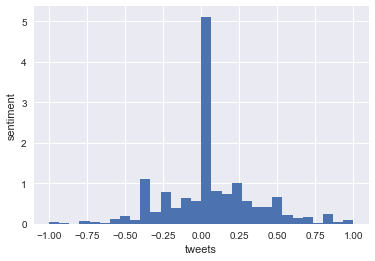

In [79]:
plt.hist(df_emoji['sentiment'], density=True, bins=30)  # density=False would make counts
plt.ylabel('sentiment')
plt.xlabel('tweets')

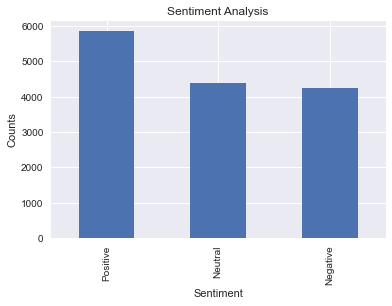

In [85]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_emoji['analysis'].value_counts().plot(kind = 'bar')
plt.show()

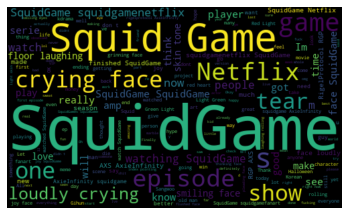

In [86]:
# word cloud visualization
allWords = ' '.join([twts for twts in df_emoji['tweet_emoji']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [83]:
df_emoji.head()

,username,tweet_emoji,sentiment,subject,polarity
1,realfearlessher,Are you playing Red Light Green Light with you...,0.150000,0.366667,pos
5,kaybizzlebee,Nah the Simpsons are at it again SquidGame ht...,0.000000,0.000000,pos
7,tiptutzone,SquidGame is the smash hit South Korean thrill...,0.374815,0.596296,pos
8,bestavailplayer,NEW POD EPISODE Jill and Justin went to the Ne...,0.334545,0.561818,pos
9,tgs_thegeekshow,SquidGame has been the talk of the town long b...,0.316667,0.316667,pos


In [84]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_emoji['analysis'] = df_emoji['sentiment'].apply(getAnalysis)
# Show the dataframe
df_emoji.head()

,username,tweet_emoji,sentiment,subject,polarity,analysis
1,realfearlessher,Are you playing Red Light Green Light with you...,0.150000,0.366667,pos,Positive
5,kaybizzlebee,Nah the Simpsons are at it again SquidGame ht...,0.000000,0.000000,pos,Neutral
7,tiptutzone,SquidGame is the smash hit South Korean thrill...,0.374815,0.596296,pos,Positive
8,bestavailplayer,NEW POD EPISODE Jill and Justin went to the Ne...,0.334545,0.561818,pos,Positive
9,tgs_thegeekshow,SquidGame has been the talk of the town long b...,0.316667,0.316667,pos,Positive


## MODEL